In [2]:
import xarray as xr
import numpy as np
from xmca.array import MCA 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [6]:
%%time
glorys_sst      = xr.open_dataset('data/GLORYS12V1/HOVMOLLERS/glorys_tropical.nc')['sst']           # load raw sst
glorys_sst_clim = xr.open_dataset('data/GLORYS12V1/HOVMOLLERS/glorys_tropical_clim.nc')['sst']      # get sst climatology
glorys_ssta     = (glorys_sst.groupby('time.dayofyear')-glorys_sst_clim).dropna('time')             # get sea surface temp anomaly
glorys_ssta     = glorys_ssta.resample({'time':'m'}).mean().dropna('time')

CPU times: user 180 ms, sys: 48.3 ms, total: 229 ms
Wall time: 227 ms


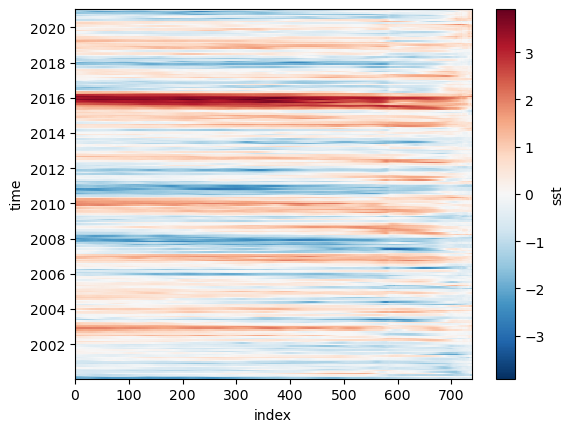

In [7]:
glorys_ssta.plot()

In [8]:
%%time
# PCA using scikit learn package
pca_scikit = PCA(n_components=10).fit(glorys_ssta.data)

CPU times: user 202 ms, sys: 422 ms, total: 624 ms
Wall time: 22.8 ms


In [9]:
%%time
# PCA using xmca package
pca_xmca = MCA(glorys_ssta.data)
pca_xmca.solve(complexify=False)

CPU times: user 2.03 s, sys: 4.94 s, total: 6.96 s
Wall time: 202 ms


In [10]:
%%time
# PCA "by hand" as eigenvectors of the covariance matrix (slow)
pc_numpy = np.linalg.eig(np.cov(glorys_ssta.data))

CPU times: user 844 ms, sys: 2.53 s, total: 3.37 s
Wall time: 97.8 ms
